# Tarea Semanal 3: Simulación de un ADC (cuantización) parte 1/2
## Magdalena Noé
En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal (aproximadamente) analógica.

Para ello se puede analizar una senoidal con los siguientes parámetros:

- frecuencia f0 arbitraria, por ejemplo f0=fS/N=Δf 
- Amplitud normalizada, es decir unitaria
Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo sR, de forma tal que para un ADC de B bits y rango ±VF, el operador Q generara una sQ comprendida entre ±VF y con valores discretos establecidos por el paso de cuantización

Visualice en una misma gráfica sR
 y sQ
, donde se pueda observar que tienen el mismo rango en Volts y el efecto de la cuantización para VF=2
 Volts y  B = 4, 8 y 16 bits.

### Parametros
- xx : señal de entrada a la cual se desea calcular su DFT

### Retorna
- XX : matriz DFT de igual dimension que la señal de entrada

#### Librerias:

In [129]:
import numpy as np
import matplotlib.pyplot as plt #Para la visualizacion de tt y xx.
from numpy.fft import fft #Para poder escribir fft() en vez de numpy.fft.fft()

## Generacion de la señal discreta sR

In [130]:
fs = 1000 # [Hz]
N = fs
fo = fs/N # [Hz]
Vmax = 1 #[Volts]

def mi_funcion_sen(vmax=1,dc=0,ff=1,ph=0,nn=1000,fs=1000):
    t = np.arange(nn) / fs
    sin = vmax * np.sin(t*2*np.pi*ff + ph) + dc
    return t, sin

t,sR = mi_funcion_sen(fs=fs, nn=N, ff=fo, vmax=Vmax)

## Cuantizacion de la señal sQ

In [131]:
Vf = 2 #[Volts] 
q_4 = Vf/2**(4-1)
q_8 = Vf/2**(8-1)
q_16 = Vf/2**(16-1)

def mi_cuantizador(x, Vf, bits):
    q = Vf/2**(bits-1)
    return np.round(x / q) * q

sq_4 = mi_cuantizador(sR, Vf, 4)
sq_8 = mi_cuantizador(sR, Vf, 8)
sq_16 = mi_cuantizador(sR, Vf, 16)

print(Vf/2**(4-1))
print(q_4)

print(Vf/2**(8-1))
print(q_8)

print(Vf/2**(16-1))
print(q_16)

0.25
0.25
0.015625
0.015625
6.103515625e-05
6.103515625e-05


## Graficos

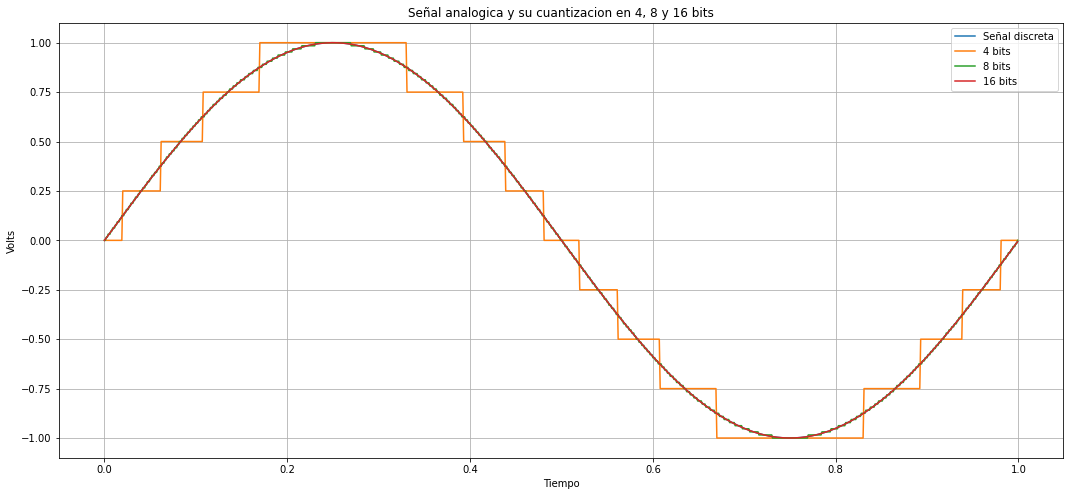

In [132]:
def graficar_funcion(abs,ord,leg="",label_y="",label_x="",titulo="",xlim=0,show=1):
    for k in np.arange(len(ord)):
        plt.plot(abs, ord[k], label=leg[k])
    if(xlim):
        plt.xlim(0, xlim)
    else:
        plt.axis('tight')

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo)
    plt.grid()
    plt.legend()
    if(show): #Para manejar subplots por fuera de la funcion
        plt.show()
    return

plt.figure(figsize=(18, 8))
graficar_funcion(t, [sR, sq_4, sq_8, sq_16],["Señal discreta","4 bits","8 bits","16 bits"], "Volts", "Tiempo", "Señal analogica y su cuantizacion en 4, 8 y 16 bits")


## Análisis de error

<Figure size 432x288 with 0 Axes>

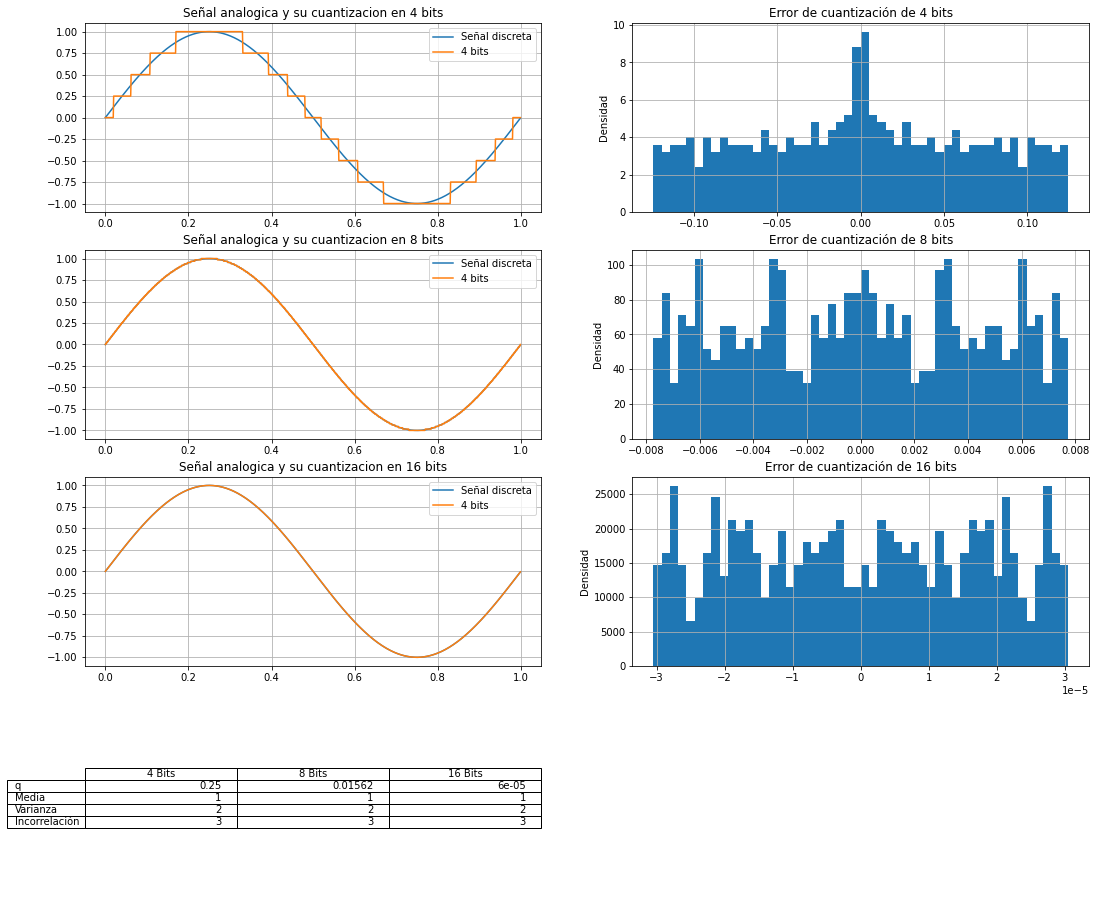

In [133]:
def graficar_funcion(abs,ord,leg="",label_y="",label_x="",titulo="",xlim=0,show=1):
    for k in np.arange(len(ord)):
        plt.plot(abs, ord[k], label=leg[k])
    if(xlim):
        plt.xlim(0, xlim)
    else:
        plt.axis('tight')

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo)
    plt.grid()
    plt.legend()
    if(show): #Para manejar subplots por fuera de la funcion
        plt.show()
    return

e_4 = sR-sq_4
e_8 = sR-sq_8
e_16 = sR-sq_16

plt.suptitle("Análisis del error de cuantización de la señal", fontsize=16, y=1.02)
plt.figure(figsize=(18, 16))

'''4 BITS'''
plt.subplot(4,2,1)
graficar_funcion(t, [sR, sq_4],["Señal discreta","4 bits"], titulo="Señal analogica y su cuantizacion en 4 bits", show=0)
plt.subplot(4,2,2)
graficar_error(e_4,"Error de cuantización de 4 bits")

'''8 BITS'''
plt.subplot(4,2,3)
graficar_funcion(t, [sR, sq_8],["Señal discreta","4 bits"], titulo="Señal analogica y su cuantizacion en 8 bits", show=0)
plt.subplot(4,2,4)
graficar_error(e_8,"Error de cuantización de 8 bits")

'''16 BITS'''
plt.subplot(4,2,5)
graficar_funcion(t, [sR, sq_16],["Señal discreta","4 bits"], titulo="Señal analogica y su cuantizacion en 16 bits", show=0)
plt.subplot(4,2,6)
graficar_error(e_16,"Error de cuantización de 16 bits")

'''Tabla'''
plt.subplot(4,2,7)
q = [round(q_4, 5), round(q_8, 5), round(q_16, 5)] # Los redondeo a 5 valores detraz de la coma
medias = [1,1,1]
vars = [2,2,2]
inc = [3,3,3]
valores = q, medias, vars, inc
rows = ["q", "Media", "Varianza", "Incorrelación"]
cols = ["4 Bits","8 Bits","16 Bits"]
plt.table(cellText=valores, rowLabels=rows, colLabels=cols, loc='center')
plt.axis('off')  # Remuevo los ejes para que solo este la tabla

plt.show()


In [128]:
def graficar_error(error, titulo=""):
    plt.hist(error, bins=50, density=True)
    plt.title(titulo)
    #plt.xlabel("Error")
    plt.ylabel("Densidad")
    plt.grid(True)
    return